In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma



In [2]:
expression <- read.csv('data/validate_layers/expression.csv', header=TRUE, row.names=1)
head(expression)

,human_759_L1,human_j12_L1,human_j3_L1,human_j4_L1,human_j6_L1,human_759_L2,human_j12_L2,human_j3_L2,human_j4_L2,human_j6_L2,⋯,X151509_WM,X151510_WM,X151669_WM,X151670_WM,X151671_WM,X151672_WM,X151673_WM,X151674_WM,X151675_WM,X151676_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.008,0.03927492,0.06363636,0.02100840,0.014925373,0.017241379,0.12571429,0.18367347,0.02564103,0.09174312,⋯,0.00000,0.005586592,0.01415094,0.000000000,0.004576659,0.002570694,0.012,0.011494253,0.007911392,0.007707129
ANGPTL4,0.008,0.17522659,0.01818182,0.04201681,0.052238806,0.004926108,0.34857143,0.05102041,0.02991453,0.08256881,⋯,0.06250,0.055865922,0.03773585,0.040935673,0.013729977,0.015424165,0.126,0.160919540,0.113924051,0.100192678
NUP133,0.088,0.09969789,0.32727273,0.18487395,0.059701493,0.169950739,0.34285714,0.82653061,0.45299145,0.24770642,⋯,0.08125,0.055865922,0.08490566,0.105263158,0.027459954,0.028277635,0.116,0.178981938,0.112341772,0.140655106
SLC6A20,0.006,0.01510574,0.00000000,0.00000000,0.089552239,0.002463054,0.01142857,0.00000000,0.01282051,0.07339450,⋯,0.00000,0.000000000,0.00000000,0.005847953,0.000000000,0.000000000,0.002,0.001642036,0.000000000,0.000000000
FRY,0.220,0.32930514,0.54545455,0.60084034,0.216417910,0.662561576,1.70285714,2.68367347,1.96153846,0.81651376,⋯,0.08750,0.050279330,0.16981132,0.111111111,0.052631579,0.028277635,0.096,0.182266010,0.080696203,0.098265896
CD8A,0.014,0.01812689,0.02727273,0.02100840,0.007462687,0.039408867,0.08571429,0.02040816,0.05982906,0.02752294,⋯,0.00625,0.005586592,0.00000000,0.005847953,0.000000000,0.002570694,0.012,0.016420361,0.004746835,0.007707129


In [3]:
annotation <- read.csv("data/validate_layers/annotation.csv", header=TRUE, row.names=1)
head(annotation)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


## Human markers

### Prepare the data
Let's filter human samples in expression and annotation dataframes

In [4]:
specie_annot <- annotation[annotation$condition == 'human',]
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


In [5]:
specie_expr <- expression[, row.names(specie_annot)]
head(specie_expr)

,human_759_L1,human_j12_L1,human_j3_L1,human_j4_L1,human_j6_L1,human_759_L2,human_j12_L2,human_j3_L2,human_j4_L2,human_j6_L2,⋯,human_759_L6,human_j12_L6,human_j3_L6,human_j4_L6,human_j6_L6,human_759_WM,human_j12_WM,human_j3_WM,human_j4_WM,human_j6_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.008,0.03927492,0.06363636,0.02100840,0.014925373,0.017241379,0.12571429,0.18367347,0.02564103,0.09174312,⋯,0.011009174,0.07920792,0.11151079,0.031339031,0.122137405,0.003875969,0.006143345,0.0201583873,0.011347518,0.017663043
ANGPTL4,0.008,0.17522659,0.01818182,0.04201681,0.052238806,0.004926108,0.34857143,0.05102041,0.02991453,0.08256881,⋯,0.007339450,0.26237624,0.03956835,0.048433048,0.081424936,0.007751938,0.202047782,0.0316774658,0.085106383,0.021739130
NUP133,0.088,0.09969789,0.32727273,0.18487395,0.059701493,0.169950739,0.34285714,0.82653061,0.45299145,0.24770642,⋯,0.139449541,0.27722772,0.50359712,0.168091168,0.256997455,0.077519380,0.045051195,0.0712742981,0.062411348,0.059782609
SLC6A20,0.006,0.01510574,0.00000000,0.00000000,0.089552239,0.002463054,0.01142857,0.00000000,0.01282051,0.07339450,⋯,0.012844037,0.01485149,0.00000000,0.002849003,0.005089059,0.011627907,0.001365188,0.0007199424,0.000000000,0.005434783
FRY,0.220,0.32930514,0.54545455,0.60084034,0.216417910,0.662561576,1.70285714,2.68367347,1.96153846,0.81651376,⋯,0.460550459,1.13861386,1.56115108,0.737891738,1.071246819,0.302325581,0.144027304,0.1756659467,0.205673759,0.195652174
CD8A,0.014,0.01812689,0.02727273,0.02100840,0.007462687,0.039408867,0.08571429,0.02040816,0.05982906,0.02752294,⋯,0.005504587,0.04950495,0.05035971,0.011396011,0.040712468,0.011627907,0.006143345,0.0043196544,0.009929078,0.008152174


In [6]:
specie_annot$layer <- factor(specie_annot$layer)
specie_annot$sample_id <- factor(specie_annot$sample_id)
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


In [7]:
y <- DGEList(counts=specie_expr, samples=specie_annot)

### Filtering and normalization
Let's check a summary table

In [8]:
summary(specie_annot)

 layer      sample_id  psbulk_cells    psbulk_counts      condition        
 L1:5   human_759:7   Min.   :  98.0   Min.   : 339404   Length:35         
 L2:5   human_j12:7   1st Qu.: 234.5   1st Qu.:1449526   Class :character  
 L3:5   human_j3 :7   Median : 338.0   Median :2354786   Mode  :character  
 L4:5   human_j4 :7   Mean   : 440.5   Mean   :2927056                     
 L5:5   human_j6 :7   3rd Qu.: 527.0   3rd Qu.:3435452                     
 L6:5                 Max.   :1465.0   Max.   :9975293                     
 WM:5                                                                      
    layer_c 
 Min.   :1  
 1st Qu.:2  
 Median :4  
 Mean   :4  
 3rd Qu.:6  
 Max.   :7  
            

In [9]:
keep.genes <- filterByExpr(y, group=y$samples$layer, min.count=0.01, min.total.count=1)
table(keep.genes)

keep.genes
FALSE  TRUE 
 4958 10409 

In [10]:
y <- y[keep.genes, , keep=FALSE]

In [11]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,1,1884.834,0.9886477,L1,human_759,500,1400502,human,1
human_j12_L1,1,2458.758,0.9700904,L1,human_j12,331,1168612,human,1
human_j3_L1,1,3381.536,1.0562937,L1,human_j3,110,536103,human,1
human_j4_L1,1,3187.929,0.9626364,L1,human_j4,238,1038124,human,1
human_j6_L1,1,1867.799,1.0380484,L1,human_j6,134,339404,human,1
human_759_L2,1,3531.507,0.9927826,L2,human_759,406,1962071,human,2
human_j12_L2,1,8694.994,1.0005029,L2,human_j12,175,2049899,human,2
human_j3_L2,1,14199.337,0.9785233,L2,human_j3,98,1861527,human,2
human_j4_L2,1,7790.167,0.9882328,L2,human_j4,234,2390952,human,2


In [12]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9460  0.9858  0.9933  1.0004  1.0086  1.0761 

### Data exploration

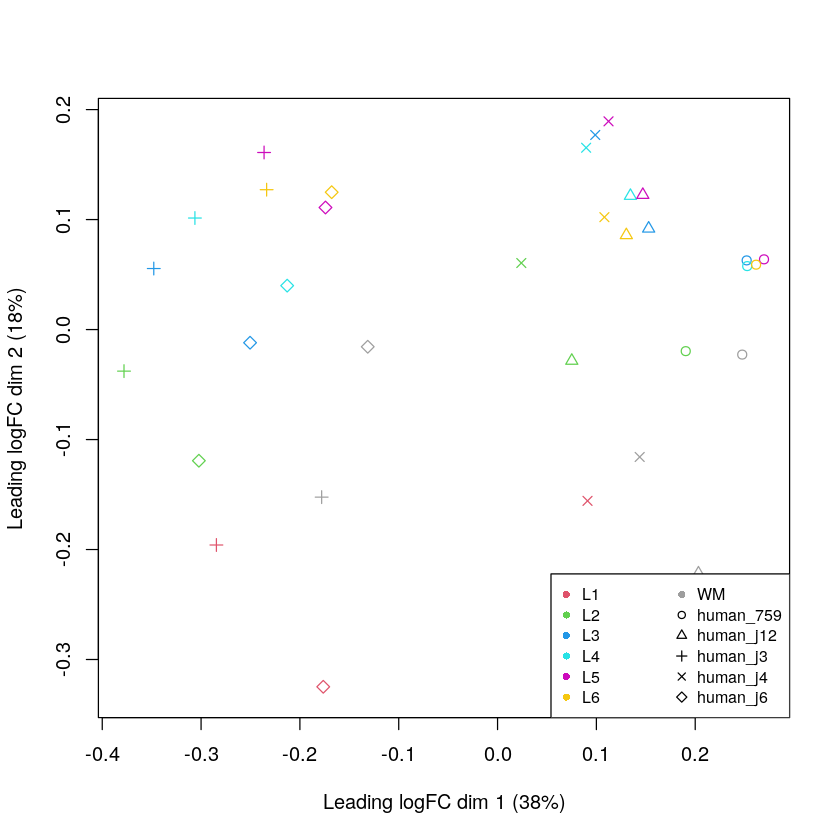

In [13]:
# Plot MDS for human markers
layer <- as.factor(y$samples$layer)
sample_id <- y$samples$sample_id
plotMDS(y, pch=c(1:5)[sample_id], col=c(2:8)[layer])
legend("bottomright", legend=c(levels(layer), levels(sample_id)), pch=c(rep(16,7), c(1:5)), col=c(c(2:8), rep(1,5)), cex=0.8, ncol=2)

### Design matrix

In [14]:
design <- model.matrix(~ 0 + layer + sample_id)
colnames(design) <- gsub("sample_id", "", colnames(design))
colnames(design) <- gsub("layer", "", colnames(design))
head(design)

,L1,L2,L3,L4,L5,L6,WM,human_j12,human_j3,human_j4,human_j6
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0


### Dispersion estimation

In [15]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 9.765625e-05

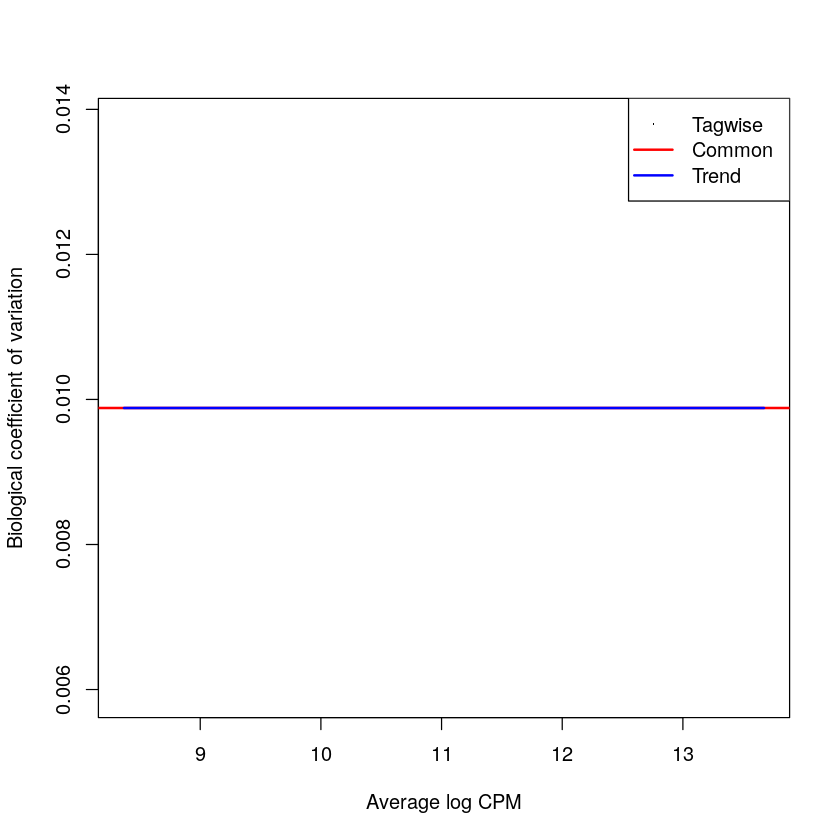

In [16]:
plotBCV(y)

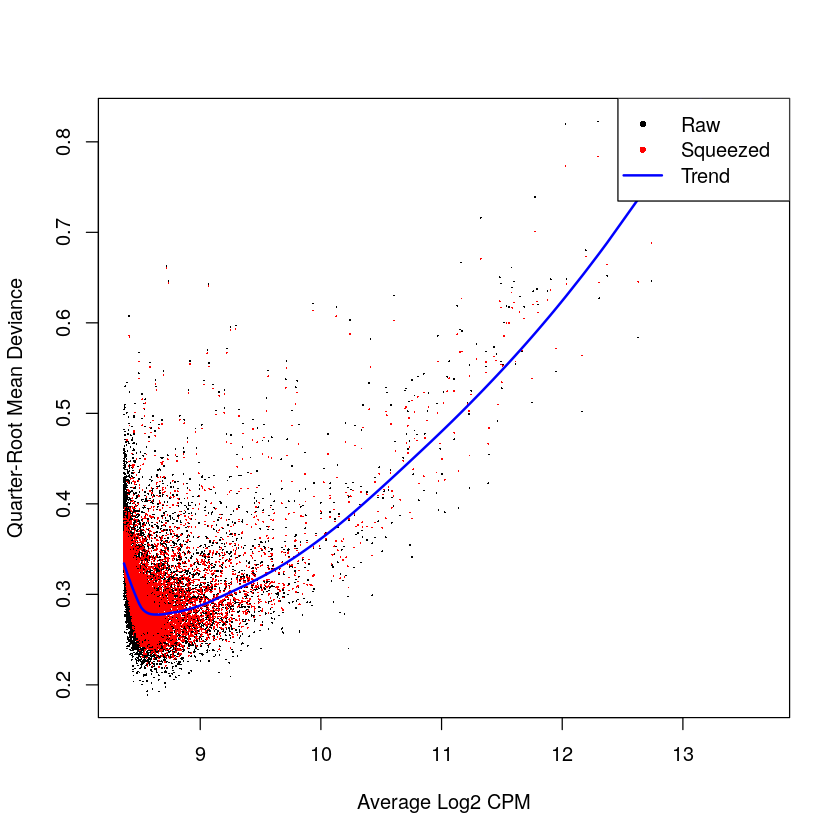

In [17]:
fit <- glmQLFit(y, design, robust=TRUE, legacy=FALSE)
plotQLDisp(fit)

### Marker genes identification
Make a contrast matrix and perform quasi-likelihood F-tests

In [18]:
ncls <- nlevels(layer)
contr <- rbind( matrix(1/(1 - ncls), ncls, ncls), matrix(0, ncol(design)-ncls, ncls) )
diag(contr) <- 1
rownames(contr) <- colnames(design)
colnames(contr) <- levels(layer)
contr
qlf <- list()
for(i in 1:ncls) {
  qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
  qlf[[i]]$comparison <- paste0(levels(layer)[i],'_vs_others')
}

,L1,L2,L3,L4,L5,L6,WM
L1,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L2,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L3,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L4,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667
L5,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667
L6,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667
WM,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000
human_j12,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
human_j3,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
human_j4,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [19]:
topTags(qlf[[1]], n=10L)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LRIG1,1.5403440,8.551945,300.5133,6.472472e-24,6.737196e-20
METRN,1.3999197,8.711310,215.0456,3.704491e-22,1.508892e-18
RELN,3.1777762,8.655628,347.4787,4.348809e-22,1.508892e-18
SLC1A3,1.3216128,9.067770,229.3220,5.327621e-21,1.386380e-17
ADGRG1,0.9951622,8.862955,184.7451,2.233157e-20,4.648986e-17
CXCL14,2.5993280,9.032178,265.4379,5.460848e-20,9.473661e-17
NR2F2,2.3017899,8.541524,261.8668,1.373363e-19,2.042190e-16
GLUL,1.0559095,9.318323,226.1535,1.952799e-19,2.540835e-16
ALDOC,0.9994537,8.901023,174.8194,4.108212e-19,4.751376e-16


In [20]:
if (!dir.exists("data/validate_layers/humanDE/")) {
  dir.create("data/validate_layers/humanDE/", recursive = TRUE)
}
for(i in 1:ncls) write.csv(qlf[[i]]$table, file=paste0('data/validate_layers/humanDE/degenes_', levels(layer)[i], '.csv'))

In [21]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call('cbind', dt)
dt.all

,L1_vs_others,L2_vs_others,L3_vs_others,L4_vs_others,L5_vs_others,L6_vs_others,WM_vs_others
Down,1058,805,438,455,567,375,45
NotSig,8414,8754,9100,9086,8791,9364,10212
Up,937,850,871,868,1051,670,152


Let's make a heatmap of the top markers

In [22]:
top <- 20
topMarkers <- list()
for (i in 1:ncls) {
  ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
  up <- qlf[[i]]$table$logFC[ord] > 0
  topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
}

topMarkers <- unique(unlist(topMarkers))
topMarkers

[1] "LRIG1"    "METRN"    "RELN"     "SLC1A3"   "ADGRG1"   "CXCL14"  
  [7] "NR2F2"    "GLUL"     "ALDOC"    "CLU"      "ID4"      "AQP4"    
 [13] "MLC1"     "PON2"     "VIM"      "NFIB"     "PLPP3"    "ATP1A2"  
 [19] "PSAT1"    "MT2A"     "EXOC6"    "MEIS2"    "MN1"      "NEUROD2" 
 [25] "CUX2"     "EIF1B"    "SLA"      "CDC42EP3" "EBPL"     "SEMA3C"  
 [31] "PCDH8"    "ENC1"     "PTPRO"    "RIMBP2"   "MYCN"     "CPNE8"   
 [37] "EPHA3"    "SRM"      "DUSP4"    "MDGA1"    "EPHA4"    "R3HDM1"  
 [43] "CA10"     "RHOU"     "SYT4"     "DACT1"    "RAC3"     "NECTIN3" 
 [49] "STXBP6"   "CHP1"     "VOPP1"    "GAP43"    "TMOD1"    "CDH8"    
 [55] "BIN1"     "RORB"     "PRPS2"    "FOXP1"    "PIK3R1"   "CXXC4"   
 [61] "SATB1"    "LDB2"     "HIVEP2"   "PRDM8"    "SSTR2"    "SYNE1"   
 [67] "NEUROD6"  "ZFAND5"   "ST6GAL2"  "NELL2"    "LPL"      "TENM1"   
 [73] "KLHL4"    "KCNMB4"   "TOX"      "IGSF21"   "SNAP25"   "PCDH19"  
 [79] "HS3ST4"   "RPRM"     "TMEM14A"  "TAC1"     "PEX5L"    "PTPRK"   
 [85] "ENO2"     "EPHB6"    "FEZF2"    "MOAP1"    "B3GALT2"  "ADCY1"   
 [91] "NPTX1"    "FAM171B"  "RASL11B"  "TMEM178A" "SSBP3"    "SNCB"    
 [97] "CD47"     "TBR1"     "SV2B"     "DNM3"     "GRIK3"    "PDZD2"   
[103] "TENM3"    "TLE4"     "PPM1L"    "NPY"      "GFAP"     "AHCYL1"  
[109] "ADD3"     "BCAN"     "PTPRZ1"   "ZC3H6"    "ZFP36L1"  "SMARCA5" 
[115] "MAN1A2"   "QKI"      "SOX8"     "RDX"      "UBAP2"

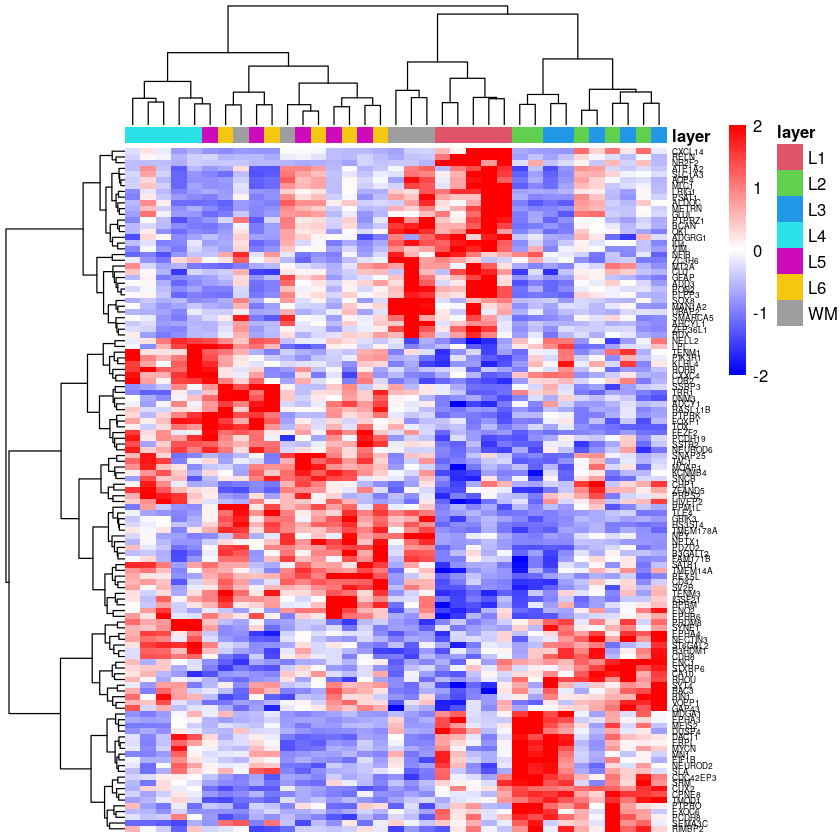

In [23]:
lcpm <- cpm(y, log=TRUE)
annot <- data.frame(layer)
rownames(annot) <- colnames(y)
ann_colors <- list(layer=2:8)
names(ann_colors$layer) <- levels(layer)
pheatmap::pheatmap(lcpm[topMarkers,], breaks=seq(-2,2,length.out=101),
                   color=colorRampPalette(c("blue", "white", "red"))(100), scale="row",
                   ckuster_cols=TRUE, border_color="NA", fontsize_row=5,
                   treeheight_row=70, treeheight_col=70, cuttree_cols=7,
                   clustering_method="ward.D2", show_colnames=FALSE,
                   annotation_col=annot, annotation_colors=ann_colors)

# Session info

In [24]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1 edgeR_4.4.2   limma_3.62.2 

loaded via a namespace (and not attached):
 [1] gtable_0.3.5       jsonlite_1.8.8     dplyr_1.1.4        compiler_4.4.0    
 [5] cra